<a href="https://colab.research.google.com/github/minjeong-kim-git/Kaggle-Practice/blob/main/Day%2007/ML03_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day03 : Logistic Regression

---

- **Team ID** : 03조

- Write and run the code below (including Quiz) in jupyter notebook
- After completion, rename the file, and summit the file to e-class
- Submit file name : **“ML01\_<#조\>.ipynb”**, send me 김동현 <donghyunkim1217@gmail.com>
  - Ex) ML01\_#조\.ipynb
- Due : **오늘 16:59pm**

# 1. Logistic regression by gradient descent

### Sample dataset
- Task: predicting $ x \rightarrow y$ (0 or 1)

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# x_train is the vector of input variables
# y_train is the vector of target values (class labels)

x_train = np.array([0.5, 2.5, 4.0, 6.0, 7.5, 9.5])
y_train = np.array([0, 0, 0, 1, 1, 1])

print('x_train =', x_train)
print('y_train =', y_train)

x_train = [0.5 2.5 4.  6.  7.5 9.5]
y_train = [0 0 0 1 1 1]


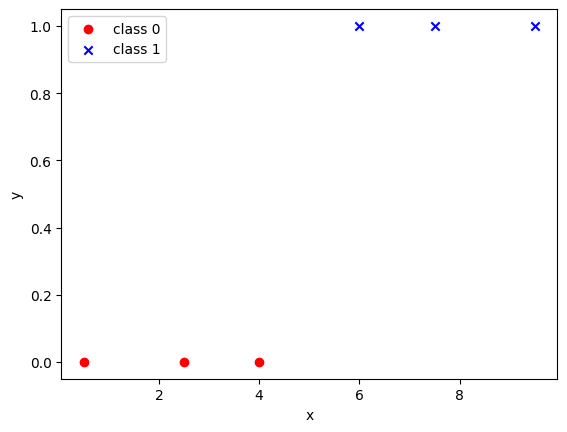

In [26]:
# plot the data points. first 3 data(class 0) as red, next 3 data(class 1) as blue
plt.scatter(x_train[:3], y_train[:3],
            color='red', marker='o', label='class 0')
plt.scatter(x_train[3:], y_train[3:],
            color='blue', marker='x', label='class 1')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

### Classification and decision boundary
- Model : $y = sigmoid(x - 5)$
- decision boundary: $x - 5 = 0$

In [27]:
# the sigmoid function
def sigmoid(z):

    # sigmoid
    y = 1 / (1 + np.exp(-z))

    return y

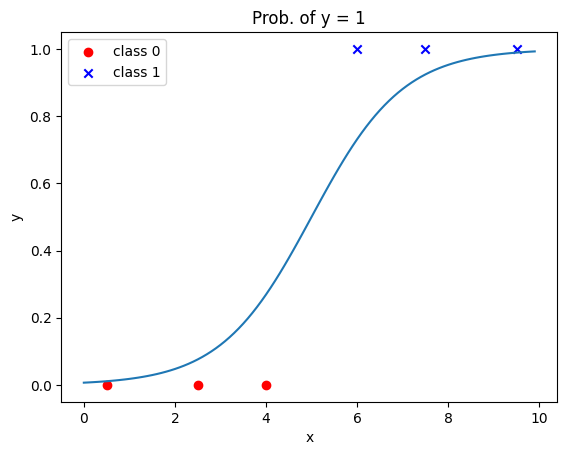

In [28]:
# plot the data points
plt.scatter(x_train[:3], y_train[:3],
            color='red', marker='o', label='class 0')
plt.scatter(x_train[3:], y_train[3:],
            color='blue', marker='x', label='class 1')

# predict y_hat for x in [0, 10]
x = np.arange(0, 10, 0.1)
y_hat = sigmoid(x - 5)

# plot y_hat
plt.plot(x, y_hat)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Prob. of y = 1')
plt.legend(loc='upper left')
plt.show()

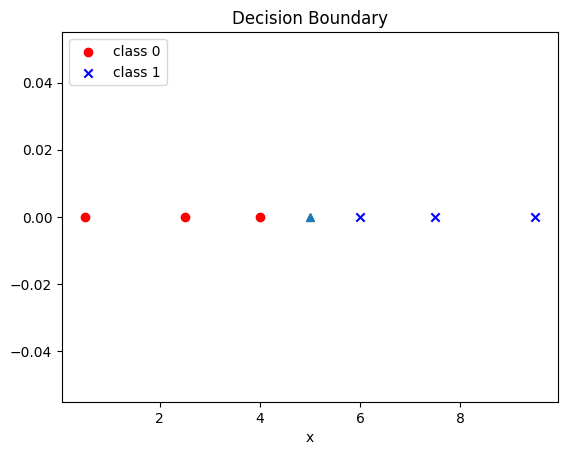

In [29]:
# plot the data points in x axis
plt.scatter(x_train[:3], [0, 0, 0],
            color='red', marker='o', label='class 0')
plt.scatter(x_train[3:], [0, 0, 0],
            color='blue', marker='x', label='class 1')

# show decision boundary
x = 5
plt.plot(x, 0, marker='^')

plt.xlabel('x')
plt.title('Decision Boundary')
plt.legend(loc='upper left')
plt.show()

### Sample dataset - 2D
- Task: predicting $ x_{0}, x_{1} \rightarrow y$ (0 or 1)
- Be careful! the name of dataset is X_train, not x_train!

In [30]:
# x_train is the vector of input variables
# y_train is the vector of target values (class labels)

X_train = np.array([[0.5, 1.5], [1.0, 1.0], [1.0, 0.5],
                    [2.5, 1.5], [2.0, 2.0], [1.0, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

print('X_train =', X_train)
print('y_train =', y_train)

X_train = [[0.5 1.5]
 [1.  1. ]
 [1.  0.5]
 [2.5 1.5]
 [2.  2. ]
 [1.  2.5]]
y_train = [0 0 0 1 1 1]


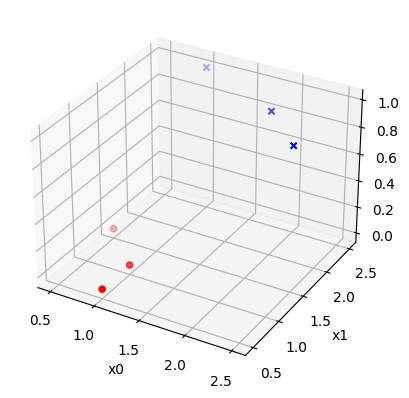

In [31]:
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# plot the data points in 3D
ax.scatter(X_train[:3,0], X_train[:3,1], y_train[:3], marker='o', c='red')
ax.scatter(X_train[3:,0], X_train[3:,1], y_train[3:], marker='x', c='blue')

plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

### Classification by a linear model
- model : $y = sigmoid(\mathbf{x \cdot w} + b) = sigmoid(w_{0} x_{0} + w_{1} x_{1} + b)$
- decision boundary: $\mathbf{x \cdot w} + b = w_{0} x_{0} + w_{1} x_{1} + b = 0$

In [32]:
# predict class by a linear model
# x : array (m, n) - m examples with n features
# y : vector (m, )
# w : model parameters (n, )
# b : model parameter scalar

def predict(x, w, b):

    # predict y_hat by the model y = sigmoid(xw + b)
    y_hat = np.dot(x, w) + b

    # class = 1 if y_hat >= 0.5. use np.where()
    y = np.where(y_hat >= 0.5, 1, 0)

    return y

- Prediction - single data
![image-5.png](attachment:image-5.png)
![image-6.png](attachment:image-6.png)
![image-3.png](attachment:image-3.png)

In [33]:
# arbitrary model parameter
w = [1.0, 1.0]
b = 1.0

print('x = ', X_train[0])
print('y = ', y_train[0])

# print y_hat = sigmoid(z), z = xw + b
z = np.dot(w, x) + b
y_hat = sigmoid(z)

print('y_hat = sigmoid(xw + b) = ', y_hat)

# predict class
print('class prediction = ', predict(z, w, b))

x =  [0.5 1.5]
y =  0
y_hat = sigmoid(xw + b) =  [0.99752738 0.99752738]
class prediction =  1


- Prediction - all data
![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)
![image-3.png](attachment:image-3.png)

In [34]:
# arbitrary model parameter
w = [1.0, 1.0]
b = 1.0

print('X = \n', X_train)
print('y = \n', y_train)

# print y_hat = sigmoid(z), z = xw + b
z = np.dot(w, x) + b
y_hat = sigmoid(z)

print('y_hat = sigmoid(xw + b) = \n', y_hat)

# predict class
print('class prediction = \n', predict(z, w, b))

X = 
 [[0.5 1.5]
 [1.  1. ]
 [1.  0.5]
 [2.5 1.5]
 [2.  2. ]
 [1.  2.5]]
y = 
 [0 0 0 1 1 1]
y_hat = sigmoid(xw + b) = 
 [0.99752738 0.99752738]
class prediction = 
 1


### Cost function
- Binary Cross Entropy
![image.png](attachment:image.png)

In [35]:
# Computes the cost function - BCE

def compute_cost(X, y, w, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0

    # compute y_hat = sigmoid(z), z = xw + b
    z = np.dot(X, w) + b
    y_hat = sigmoid(z)

    # compute cost = binary cross entropy. Use np.log()
    cost = -y * np.log(y_hat) - (1-y) * np.log(1 - y_hat)
    cost = np.sum(cost) / m

    return cost


In [36]:
print('w =', w)
print('b =', b)
print('y_train =', y_train)

z = np.dot(x, w) + b
y_hat = sigmoid(z)
print('y_hat =  ', y_hat)

# check the cost for the model with w = [1.0, 1.0], b = 1.0
cost = compute_cost(X_train, y_train, w, b)

print('--> cost =', cost)

w = [1.0, 1.0]
b = 1.0
y_train = [0 0 0 1 1 1]
y_hat =   [0.99752738 0.99752738]
--> cost = 1.4500904798778118


### Computing gradients
![image-2.png](attachment:image-2.png)
![image-5.png](attachment:image-5.png)
![image-4.png](attachment:image-4.png)
![image-3.png](attachment:image-3.png)

In [37]:
def compute_gradient(X, y, w, b):
    """
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters
      b (scalar)      : model parameter
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape

    dj_dw = np.zeros((n,))
    dj_db = 0.

    # compute y_hat
    y_hat = sigmoid(np.dot(X, w) + b)
    err = y_hat - y

    # compute gadients
    dj_dw = np.dot(X.T, err) / m
    dj_db = np.sum(err) / m

    return dj_dw, dj_db

In [38]:
print('w =', w)
print('b =', b)
print('X_train =', X_train)
print('y_train =', y_train)

# check the gradients for current w, b
dj_dw, dj_db = compute_gradient(X_train, y_train, w, b)

print('dj_dw =', dj_dw)
print('dj_db =', dj_db)

w = [1.0, 1.0]
b = 1.0
X_train = [[0.5 1.5]
 [1.  1. ]
 [1.  0.5]
 [2.5 1.5]
 [2.  2. ]
 [1.  2.5]]
y_train = [0 0 0 1 1 1]
dj_dw = [0.38531637 0.46543565]
dj_db = 0.46748623819074336


### Gradient descent
- Repeat
![image-2.png](attachment:image-2.png)

In [39]:
def gradient_descent(X, y, w, b, alpha, num_iters):
    """
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w (ndarray (n,)): model parameters
      b (scalar)      : model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
    """
    # a list to store cost J at each iteration
    J_history = []

    for i in range(num_iters):

        # compute the gradient
        dj_dw, dj_db = compute_gradient(X, y, w, b)

        # update Parameters
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # save cost to J_history list
        J_history.append(compute_cost(X, y, w, b) )

        # print cost every 1000 iteration
        if (i % 1000) == 0:
            print('Iteration %5d: Cost %0.2e ' % (i, J_history[-1]))

    return w, b, J_history

### Logistic regression by gradient descent
- Starting from initial parameters
- Use GD to get the parameters

In [40]:
# initialize parameters
w_init = np.zeros(X_train.shape[1])
b_init = 0.

# set the hyperparameters, 0.1 and 10000
alpha = 0.1
iterations = 10000

# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, w_init, b_init, alpha, iterations)

# print the learned parameters
print(f"\n parameters: w = {w_final}, b = {b_final}")

Iteration     0: Cost 6.81e-01 
Iteration  1000: Cost 1.23e-01 
Iteration  2000: Cost 6.63e-02 
Iteration  3000: Cost 4.53e-02 
Iteration  4000: Cost 3.45e-02 
Iteration  5000: Cost 2.79e-02 
Iteration  6000: Cost 2.34e-02 
Iteration  7000: Cost 2.02e-02 
Iteration  8000: Cost 1.77e-02 
Iteration  9000: Cost 1.58e-02 

 parameters: w = [4.3876931  5.03096199], b = -13.24166197110235


### Plotting cost change

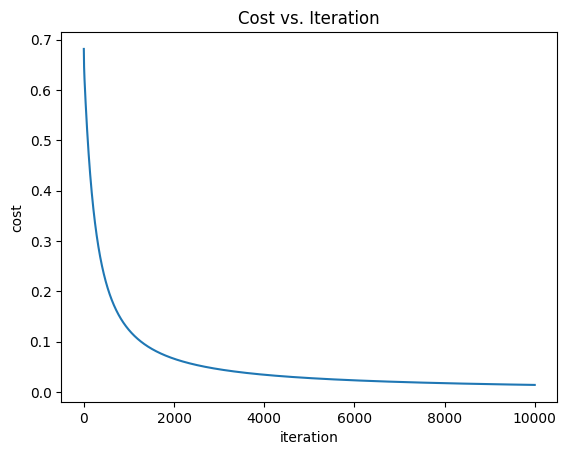

In [41]:
# plot cost during iteration 1 ~ 10000
plt.plot(J_hist[:10000])

plt.title("Cost vs. Iteration")
plt.ylabel('cost')
plt.xlabel('iteration')
plt.show()

### Plotting the learned model
![image-2.png](attachment:image-2.png)

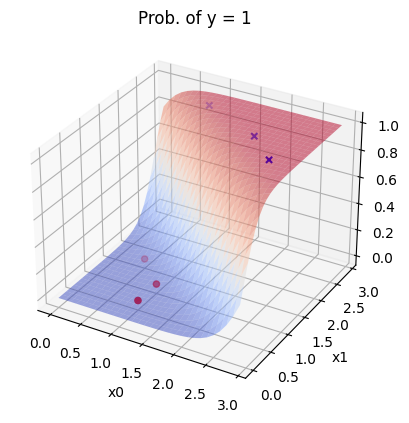

In [42]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# plot the data points
ax.scatter(X_train[:3,0], X_train[:3,1], y_train[:3], marker='o', c='red')
ax.scatter(X_train[3:,0], X_train[3:,1], y_train[3:], marker='x', c='blue')

# compute y_hat for all meshgrid using learned w and b
x0 = np.arange(0, 3, 0.1)
x1 = np.arange(0, 3, 0.1)
x0, x1 = np.meshgrid(x0, x1)
y_hat = sigmoid(x0 * w_final[0] + x1 * w_final[1] + b_final)

# show the model by plotting y_hat
ax.plot_surface(x0, x1, y_hat, cmap=cm.coolwarm, alpha=0.5)

plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Prob. of y = 1')
plt.show()

### Decisioin boundary in feature space
![image-5.png](attachment:image-5.png)
![image-6.png](attachment:image-6.png)

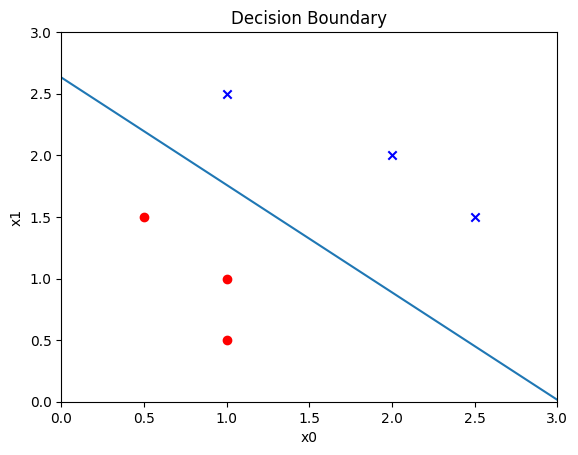

In [43]:
# plot the data points in feature space (x0, x1 plane)
plt.scatter(X_train[:3, 0], X_train[:3, 1], marker='o', c='red')
plt.scatter(X_train[3:, 0], X_train[3:, 1], marker='x', c='blue')

plt.axis([0, 3, 0, 3])

# decision boundary

x0 = np.arange(0,4)
x1 = -w_final[0] / w_final[1] * x0 - b_final / w_final[1]
plt.plot(x0, x1)

plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Decision Boundary')
plt.show()

### Accuracy of the model

In [44]:
# Compute the class prediction and accuracy of the model
y_pred = predict(X_train, w_final, b_final)
accuracy = np.sum(y_train == y_pred)/len(y_train)

print("Accuracy on the training set =", accuracy)

Accuracy on the training set = 1.0


---

# 2. Logistic regression using scikit learn

### Load iris dataset
- x features:  
 0 - sepal length in cm  
 1 - sepal width in cm  
 2 - petal length in cm  
 3 - petal width in cm  
- y classes:  
 0 (Setosa) / 1 (Versicolor) / 2 (Virginica)
![image.png](attachment:image.png)

In [45]:
import numpy as np
import pandas as pd
from sklearn import datasets

# load the scikit learn iris dataset, use datasets.load_iris()
iris = datasets.load_iris()

# print data and feature names. data has 4 features
print(iris.data)
print(iris.feature_names)

# print target and feature names.target is 0(setosa), 1(versicolor), or 2(virginica)
print(iris.target)
print(iris.target_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [46]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [51]:
# get training data X, y by selecting first 100 examples
# select 2 features, 2:petal length and 3:petal width
X = np.array(df[['petal length (cm)', 'petal width (cm)']][:100])
y = np.array(df['target'][:100])

# print X, y shapes
print(X.shape)
print(y.shape)

# print class labels. use np.unique()
print('Class labels:', np.unique(y))

(100, 2)
(100,)
Class labels: [0 1]


### Plotting the data

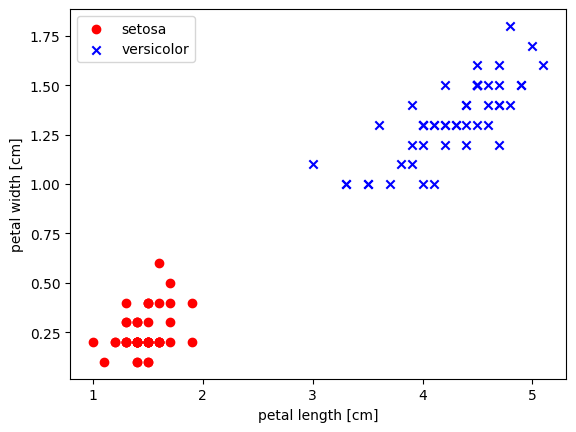

In [52]:
# plotting data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

### Splitting data into 70% training data & 30% test data

In [53]:
from sklearn.model_selection import train_test_split

# make training set and test set. use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [54]:
# check the shape of training and test data
print(X_train.shape)
print(X_test.shape)

(70, 2)
(30, 2)


### Training the model using LogisticRegression

In [56]:
from sklearn.linear_model import LogisticRegression

# training the model. use LogisticRegression with C=100
lr = LogisticRegression(C=100)
lr.fit(X_train, y_train)

LogisticRegression(C=100)

In [57]:
# print the learned model parameters. w: coef_, b: intercept_
print('w = ', lr.coef_)
print('b = ', lr.intercept_)

w =  [[5.63847803 2.85271383]]
b =  [-16.42946623]


### Plotting decision regions
- use plot_decision_regions function below

In [58]:
# A function for plotting decision regions
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 'x', 's', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx], marker=markers[idx], label=cl)

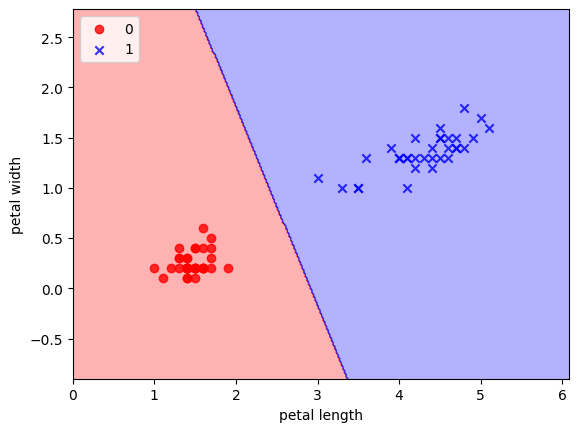

In [59]:
# plot decision boundary of the model
plot_decision_regions(X_train, y_train, classifier=lr)

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

### Accuracy of the model

In [60]:
# train and test accuracy of the model. use .score(X, y)
print('Training accuracy: %.2f' % lr.score(X_train, y_train))
print('Test accuracy: %.2f' % lr.score(X_test, y_test))

Training accuracy: 1.00
Test accuracy: 1.00


### Probability of class 0 and 1

In [61]:
# probability of class 0, 1 for first 5 test data. use .predict_proba()
print(lr.predict_proba(X_test[:5]))

[[2.93090640e-04 9.99706909e-01]
 [1.80896179e-06 9.99998191e-01]
 [9.99652728e-01 3.47272235e-04]
 [6.84856372e-04 9.99315144e-01]
 [6.49487954e-03 9.93505120e-01]]


### Prediction of class labels

In [65]:
print('True test labels :', y_test[:5])

# predicting labels of first 5 test dataset
print('Predicted labels :', lr.predict(X_test[:5]))

True test labels : [1 1 0 1 1]
Predicted labels : [1 1 0 1 1]


---

# 3. Logistic Regression - Multinomial Classification

###  Load iris dataset

In [66]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [67]:
# get training data X, y from all 150 examples
# select 2 features, 2:petal length and 3:petal width
X = iris.data[:, [2, 3]]
y = iris.target

print(X.shape)
print(y.shape)
print('Class labels:', np.unique(y))

(150, 2)
(150,)
Class labels: [0 1 2]


### Splitting data into 70% training data & 30% test data

In [68]:
from sklearn.model_selection import train_test_split
# train test split. use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, random_state=1, stratify=y)

In [69]:
# check the shape of training and test data
print(X_train.shape)
print(X_test.shape)

(105, 2)
(45, 2)


### Plotting the training data

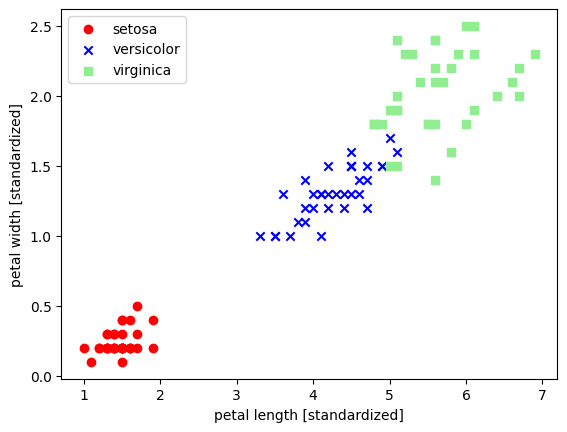

In [70]:
# plotting data for class 0, 1, 2
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1],
            color='blue', marker='x', label='versicolor')
plt.scatter(X_train[y_train==2, 0], X_train[y_train==2, 1],
            color='lightgreen', marker='s', label='virginica')

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

### Training the model using LogisticRegression
- 3 set of w and b parameters
![image.png](attachment:image.png) ![image-2.png](attachment:image-2.png)

In [71]:
from sklearn.linear_model import LogisticRegression

# training the model. use LogisticRegression with C=100, multi_class='ovr'
lr = LogisticRegression(C=100, multi_class='ovr')

lr.fit(X_train, y_train)

LogisticRegression(C=100, multi_class='ovr')

In [72]:
# print the learned model parameters. w: coef_, b: intercept_
print('w = ', lr.coef_)
print('b = ', lr.intercept_)

w =  [[-5.52741894 -2.26767352]
 [ 1.34492291 -2.71926866]
 [ 6.95808994  7.36736804]]
b =  [ 16.33234585  -2.59905851 -46.45251225]


### Plotting decision regions
- use plot_decision_regions function

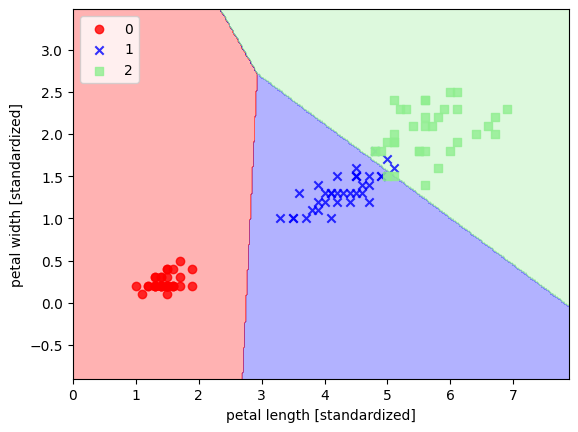

In [73]:
#X_combined_std = np.vstack((X_train_std, X_test_std))
#y_combined = np.hstack((y_train, y_test))

# decision boundary of the model
plot_decision_regions(X_train, y_train, classifier=lr)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

### Accuracy of the model

In [74]:
# train and test accuracy of the model. use .score(X, y)
print('Training accuracy: %.2f' % lr.score(X_train, y_train))
print('Test accuracy: %.2f' % lr.score(X_test, y_test))

Training accuracy: 0.95
Test accuracy: 0.98


### Probability of class 0, 1, 2

In [75]:
# probability of class 0, 1, 2 for first 5 test data. use .predict_proba()
print(lr.predict_proba(X_test[:5]))

[[6.27006745e-09 1.44806162e-01 8.55193832e-01]
 [8.34564702e-01 1.65435298e-01 1.46365975e-14]
 [8.49059341e-01 1.50940659e-01 8.82090981e-16]
 [1.35565353e-05 7.76776434e-01 2.23210009e-01]
 [3.69241060e-05 9.89606981e-01 1.03560948e-02]]


### Prediction of class labels

In [76]:
# predicting labels of first 5 test dataset
y_pred = lr.predict(X_test)

print('True test labels :', y_test[:5])
print('Predicted labels :', y_pred[:5])

True test labels : [2 0 0 2 1]
Predicted labels : [2 0 0 1 1]


### Effect of regularization

In [79]:
# list of C values, learned weights, test accuracy
params, weights, test_acc = [], [], []

# learn weights w[1] and accuracy for C in 10**-5 to 10**5
for c in np.arange(-5, 5):

    # learn the weights using LogisticRegression, multi_class='ovr'
    lr = LogisticRegression(C=10.**c, multi_class='ovr')
    lr.fit(X_train, y_train)

    # record the C values, learned weights, test accuracy
    params.append(10.**c)
    weights.append(lr.coef_[1])
    test_acc.append(lr.score(X_test, y_test))


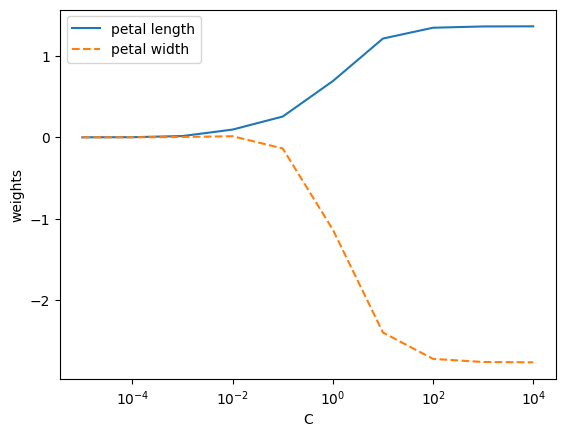

In [80]:
weights = np.array(weights)

# plotting weights for each C
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], label='petal width', linestyle='--')
plt.ylabel('weights')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()